In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Only importing Adj Close
WFC_DF = yf.download('WFC', start = '2013-01-01',end='2023-01-01')['Adj Close']
BAC_DF = yf.download('BAC', start = '2013-01-01',end='2023-01-01')['Adj Close']
JPM_DF = yf.download('JPM', start = '2013-01-01',end='2023-01-01')['Adj Close']
C_DF = yf.download('C', start = '2013-01-01',end='2023-01-01')['Adj Close']

# Combining the data frames by columns. 
Banks = pd.concat([WFC_DF,BAC_DF,JPM_DF,C_DF], axis = 1)
# axis = 1 for columns, 0 is the default.

# Adding titles to the columns.
Banks.columns = ['WFC','BAC','JPM','C']

# Getting all columns in the dataframe ready to be used for the daily return.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Difference between logs and regular daily returns.

# Calculating daily returns 
print(Banks.pct_change(1))

# Calculating daily log returns
print(np.log(1+Banks.pct_change(1)))

# Same as daily log returns
log_rets = np.log(Banks/ Banks.shift(1)) 

# How to solve logs:
# https://www.youtube.com/watch?v=mQTWzLpCcW0

                 WFC       BAC       JPM         C
Date                                              
2013-01-02       NaN       NaN       NaN       NaN
2013-01-03 -0.008274 -0.005819 -0.002015  0.003394
2013-01-04  0.005178  0.012542  0.017725  0.025126
2013-01-07 -0.004866 -0.001652  0.001103  0.000943
2013-01-08 -0.001725 -0.009099  0.001982 -0.000235
...              ...       ...       ...       ...
2022-12-23  0.007375  0.002470  0.004745  0.006138
2022-12-27  0.001464  0.001848  0.003504  0.002937
2022-12-28  0.001949  0.007378  0.005465  0.005181
2022-12-29  0.005107  0.011291  0.005738  0.012102
2022-12-30 -0.000968 -0.000603  0.006606  0.001550

[2518 rows x 4 columns]
                 WFC       BAC       JPM         C
Date                                              
2013-01-02       NaN       NaN       NaN       NaN
2013-01-03 -0.008308 -0.005836 -0.002017  0.003388
2013-01-04  0.005165  0.012464  0.017570  0.024816
2013-01-07 -0.004878 -0.001653  0.001102  0.000942
2013-0

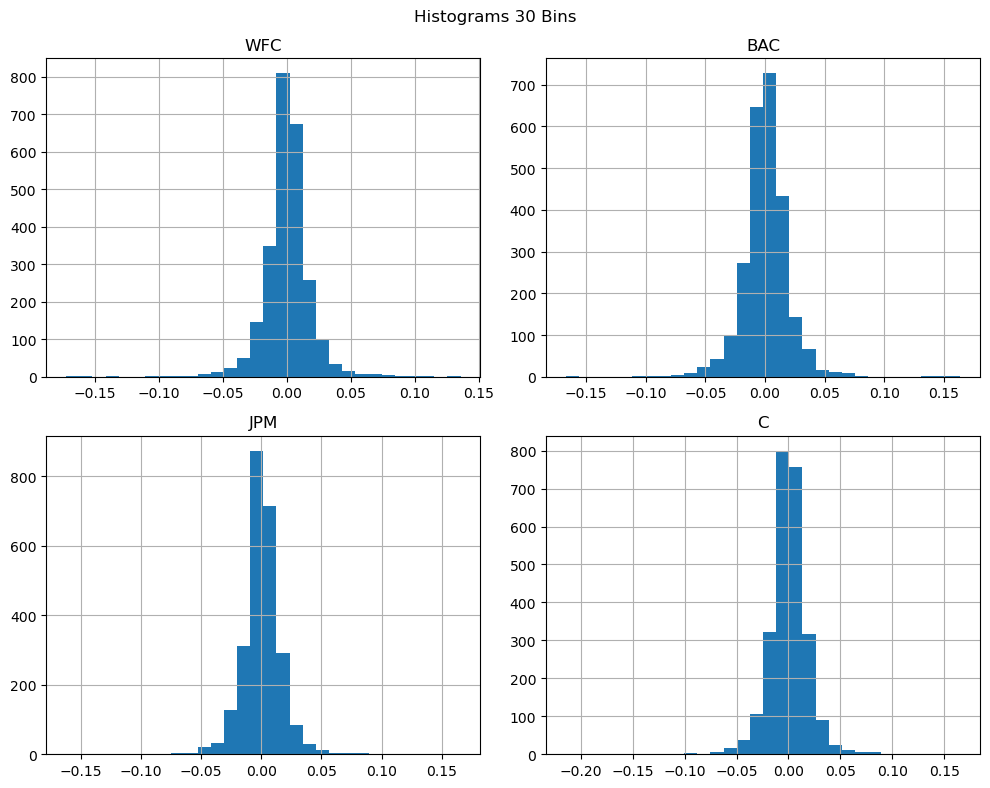

In [46]:
# Histograms shows that the returns are normally distributed.

log_rets.hist(bins=30,figsize=(10,8))
plt.suptitle("Histograms 30 Bins")
plt.tight_layout()
plt.savefig('Histogram.jpg')

In [18]:
# Generating 4 random numbers when summed equal to 100%
def gen_weights(N = 4):
    global weights
    weights = np.random.random(N)
    return weights/np.sum(weights)

n = '\n' # newline
print(f'Four randomly generated numbers for each column:{n}{gen_weights()}')

# Calculating Annual log returns
def calculate_annual_returns(weights = gen_weights(), log_rets = log_rets):
    return np.sum(log_rets.mean()*weights) * 252

print('')
print(f'Log annual returns are equal to: {n}{calculate_annual_returns()}')
print('')
print(f'Log mean for each column in the dataframe (static):{n}{log_rets.mean()}')

'''''
# Annual Volatility using Covariance. 
def calculate_volatility(weights = gen_weights(),log_rets_cov = log_rets.cov):
    annualized_cov = np.dot(log_rets_cov * 252,weights) # Using cross multiplication to get the annual version of covariance.
    vol = np.dot(weights,annualized_cov)
    return np.sqrt(vol)
# This caused a type error when using np.dot(log_rets_cov * 252,weights).
'''''
def portfolio_v(weights = gen_weights(),log_rets = log_rets):
    portfolio_vol = np.sqrt(np.dot(weights,np.dot(log_rets.cov()*252,weights)))
    return portfolio_vol
# https://stackoverflow.com/questions/47479225/calculating-portfolio-variance-and-volatility-in-python
# "The cov () NumPy function can be used to calculate a covariance matrix between two or more variables."
# More information on covariance: https://www.geeksforgeeks.org/python-numpy-cov-function/

print('')
print(f'Portfollio volatility using covariance: {n}{portfolio_v()}')

Four randomly generated numbers for each column:
[0.28172637 0.1125876  0.40295283 0.20273319]

Log annual returns are equal to: 
0.09287272418686848

Log mean for each column in the dataframe (static):
WFC    0.000179
BAC    0.000467
JPM    0.000544
C      0.000111
dtype: float64

Portfollio volatility using covariance: 
0.2697249724501595


In [34]:
# Keeping track of all the information.

list_portfolio_returns = []
list_portfolio_vol = []
list_weights = [] 

# Creating a loop and running the simulation 3000 times.
x = 0
while x <= 3000:
    x += 1
    weights = gen_weights() 
    list_weights.append(weights)
    list_portfolio_returns.append(calculate_annual_returns(weights))
    list_portfolio_vol.append(portfolio_v(weights))
mc_sharpe_ratios = np.array(list_portfolio_returns)/np.array(list_portfolio_vol)
# weights has be included in the functions to ensure they are consistent.

Text(0, 0.5, 'RET')

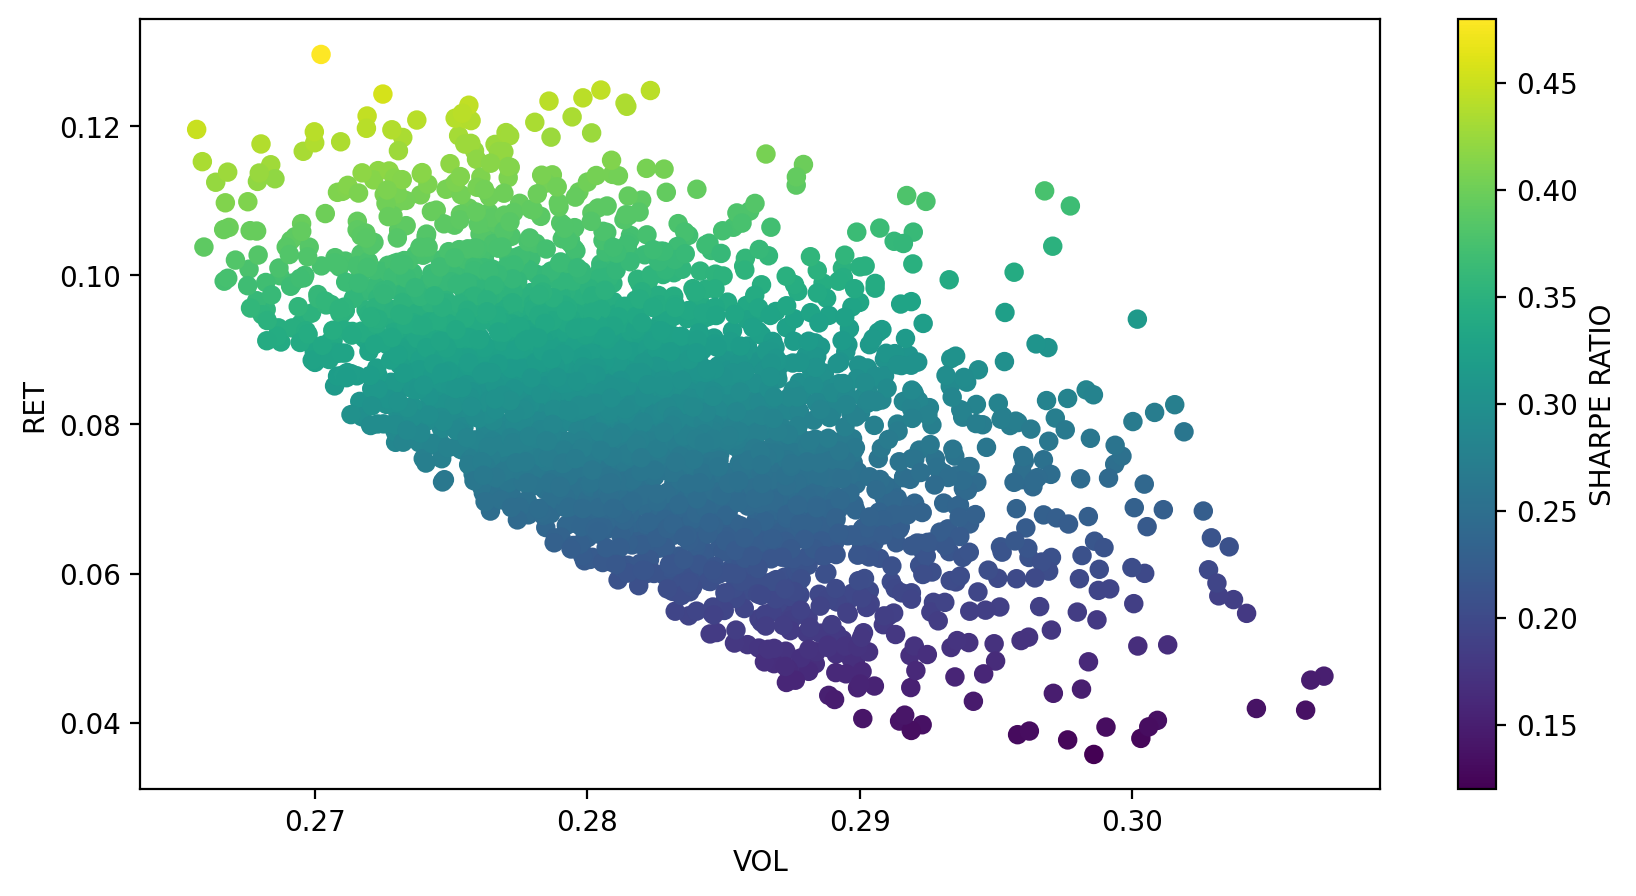

In [35]:
# Creating a scatter plot

plt.figure(dpi=200,figsize=(10,5))

plt.scatter(list_portfolio_vol,list_portfolio_returns, c=mc_sharpe_ratios)

plt.colorbar(label='SHARPE RATIO')

plt.xlabel('VOL')

plt.ylabel('RET')

plt.savefig('Scatterplot.jpg')

In [50]:
# Finding the postion for the optimal portfolio holdings

def max_value():
    am = np.argmax(mc_sharpe_ratios)
    return am 

print(list_weights[max_value()])

[0.00393773 0.14446145 0.81124326 0.04035757]
